In [1]:
# Import necessary libraries.
import numpy as np
import helpers
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [105]:
# Load data.
X_train, y_train, X_test, y_test = helpers.load_data('train.csv', split=0.8, blacklist=['LOAN_ID'])

In [106]:
# Ensuring that all the data is floats.
X_train = np.array([ [0 if element=='' else float(element) for element in row] for row in X_train])
X_test = np.array([ [0 if element=='' else float(element) for element in row] for row in X_test])
y_train = np.array([ float(element) for element in y_train])
y_test = np.array([ float(element) for element in y_test])

In [107]:
# Normalising training & test data.

X_train = helpers.normalise_data(X_train, [0,1,2,5,7,8,9,13])
X_test = helpers.normalise_data(X_test, [0,1,2,5,7,8,9,13])

In [108]:
# Creating & compiling the model.

model = Sequential()
model.add(Dense(92, input_dim=14, activation='relu'))
model.add(Dense(46, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Training the model.

model.fit(X_train, y_train, epochs=40, batch_size=25)

Epoch 1/40
2860/2860 [==============================] - 1s 219us/step - loss: 0.4473 - acc: 0.8175
Epoch 2/40
2860/2860 [==============================] - 0s 39us/step - loss: 0.3961 - acc: 0.8311
Epoch 3/40
2860/2860 [==============================] - 0s 49us/step - loss: 0.3761 - acc: 0.8451
Epoch 4/40
2860/2860 [==============================] - 0s 44us/step - loss: 0.3605 - acc: 0.8528
Epoch 5/40
2860/2860 [==============================] - 0s 38us/step - loss: 0.3474 - acc: 0.8605
Epoch 6/40
2860/2860 [==============================] - 0s 38us/step - loss: 0.3399 - acc: 0.8643
Epoch 7/40
2860/2860 [==============================] - 0s 33us/step - loss: 0.3316 - acc: 0.8759
Epoch 8/40
2860/2860 [==============================] - 0s 38us/step - loss: 0.3334 - acc: 0.8766
Epoch 9/40
2860/2860 [==============================] - 0s 33us/step - loss: 0.3261 - acc: 0.8804
Epoch 10/40
2860/2860 [==============================] - 0s 38us/step - loss: 0.3219 - acc: 0.8776
Epoch 11/40
2860/2

In [99]:
# Predicting from the test set.

y_pred = model.predict(X_test)
y_pred = np.round(y_pred[:,0])
y_correct = abs(y_pred - y_test)
percentage = 100 - ((sum(y_correct)/y_correct.size)*100)
print("The model ran with " +str(percentage) + "% accuracy.")

The model ran with 51.5363128492% accuracy.


In [63]:
# Checking bad cases.

bad_indexes = [X_test[i] for i in range(X_test.shape[0]) if y_correct[i]==1]
bad_indexes = np.array(bad_indexes)

0.631852718528
0.605596179522


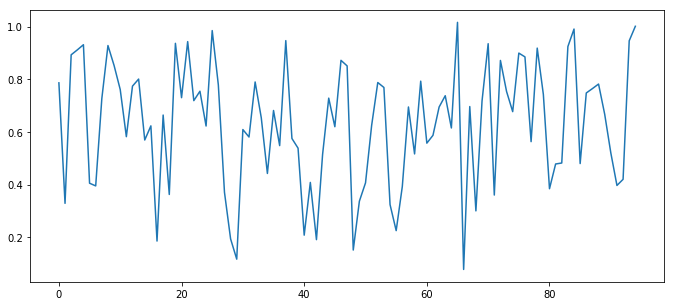

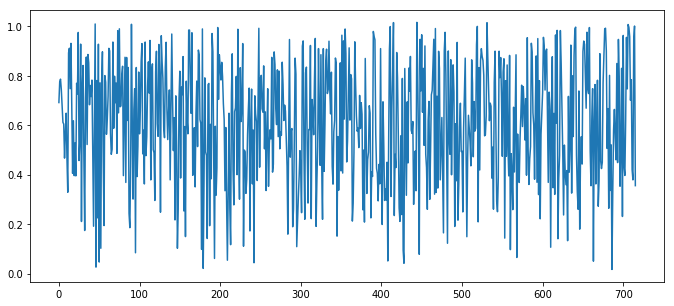

In [70]:
# Plot playground for bad indices.

plt.figure(1, (25,5))
plt.subplot(121)
print(np.mean(bad_indexes[:, 13]))
plt.plot(bad_indexes[:, 13])
#plt.scatter(np.arange(bad_indexes[:,2].size), bad_indexes[:, 10])
#unique, counts = np.unique(bad_indexes[:, 10], return_counts=True)
#print(np.asarray((unique, counts/sum(counts))).T)

plt.figure(2, (25,5))
plt.subplot(122)
plt.plot(X_test[:,13])
print(np.mean(X_test[:,13]))
#plt.scatter(np.arange(X_test[:, 1].size), X_test[:, 10])
#unique, counts = np.unique(X_test[:, 10], return_counts=True)
#print(np.asarray((unique, counts/sum(counts))).T)

plt.show()